<a href="https://colab.research.google.com/github/ferperezh/IIC3633_ProyectoMetricaDiversidad/blob/main/procesamiento_pelicula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento de data de Pelicula

Primero creamos una instancia para descargar los archivos de pelicula de kaggle. Pero primero debes subir al colab el archivo `kaggle.json` con el usuario y permisos del kaggle.


In [1]:
# Crear el directorio .kaggle en Colab
!mkdir -p ~/.kaggle

# Mover el archivo kaggle.json al directorio .kaggle
!cp kaggle.json ~/.kaggle/

# Cambiar los permisos del archivo kaggle.json para asegurar privacidad
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Instalamos la libreria kaggle para poder usarla

In [2]:
!pip install kaggle

Primero descargamos el dataset de [kaggle_movielens](https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset?select=rating.csv). Para tener más información de la cancion.



In [3]:
# Descargar el dataset
!kaggle datasets download -d grouplens/movielens-20m-dataset

# Descomprimir el archivo zip descargado
import zipfile
with zipfile.ZipFile("movielens-20m-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("movielens-20m-dataset")

print("Path to dataset files: movielens-20m-dataset")

Dataset URL: https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset
License(s): unknown
100% 195M/195M [00:02<00:00, 79.8MB/s]
100% 195M/195M [00:02<00:00, 83.6MB/s]
Path to dataset files: movielens-20m-dataset


In [4]:
# Verificar archivos en el directorio
!ls movielens-20m-dataset

genome_scores.csv  genome_tags.csv  link.csv  movie.csv  rating.csv  tag.csv


Ahora se carga los archivos .csv para poder unirlos y tener la información sobre cada canción para poder hacer la categorización de las canciones.

In [7]:
import pandas as pd

genome_scores = pd.read_csv('movielens-20m-dataset/genome_scores.csv')
genome_tags = pd.read_csv('movielens-20m-dataset/genome_tags.csv')
links = pd.read_csv('movielens-20m-dataset/link.csv')
movies = pd.read_csv('movielens-20m-dataset/movie.csv')
ratings = pd.read_csv('movielens-20m-dataset/rating.csv')
tags = pd.read_csv('movielens-20m-dataset/tag.csv')

In [11]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [13]:
ratings['userId'].nunique()

138493

In [14]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


Vemos que el promedio general dado a las peliculas es de 3.5 por lo que mayo a 3.5 de forma general seria las peliculas que consideramos parte del usuario. Pero para mas especificidad veremos el promedio por cada usuario y es ese el limite para distinguir las peliculas "elegidas por el usuario"

In [21]:
# Agrupar por usuario la tabla raitings para tener el rating promedio que le da a las peliculas
ratings_por_usuario = ratings.groupby('userId')['rating'].mean()
# Hacemos un round a la decima
ratings_por_usuario = ratings_por_usuario.round(1)
ratings_por_usuario

# Ahora agregamos la columna rating_mean a la tabla rating con esta informacion
ratings['rating_mean'] = ratings['userId'].map(ratings_por_usuario)
ratings

,userId,movieId,rating,timestamp,rating_mean
0,1,2,3.5,2005-04-02 23:53:47,3.7
1,1,29,3.5,2005-04-02 23:31:16,3.7
2,1,32,3.5,2005-04-02 23:33:39,3.7
3,1,47,3.5,2005-04-02 23:32:07,3.7
4,1,50,3.5,2005-04-02 23:29:40,3.7
...,...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00,4.2
20000259,138493,69526,4.5,2009-12-03 18:31:48,4.2
20000260,138493,69644,3.0,2009-12-07 18:10:57,4.2
20000261,138493,70286,5.0,2009-11-13 15:42:24,4.2


In [22]:
# Filtramos por todos los ratings que son mayor o igual al rating_mean
ratings_filtrados = ratings[ratings['rating'] >= ratings['rating_mean']]
ratings_filtrados

,userId,movieId,rating,timestamp,rating_mean
6,1,151,4.0,2004-09-10 03:08:54,3.7
7,1,223,4.0,2005-04-02 23:46:13,3.7
8,1,253,4.0,2005-04-02 23:35:40,3.7
9,1,260,4.0,2005-04-02 23:33:46,3.7
10,1,293,4.0,2005-04-02 23:31:43,3.7
...,...,...,...,...,...
20000256,138493,66762,4.5,2009-10-17 18:50:08,4.2
20000257,138493,68319,4.5,2009-12-07 18:15:20,4.2
20000258,138493,68954,4.5,2009-11-13 15:42:00,4.2
20000259,138493,69526,4.5,2009-12-03 18:31:48,4.2


Ahora con estas peliculas las establecemos como las seleccionadas por el usuario las conectamos con la infromacion de la pelicula para tener los generos

In [23]:
#Merge de ratings filtrados con movies
movies_data = pd.merge(ratings_filtrados, movies, on='movieId', how='inner')
movies_data

,userId,movieId,rating,timestamp,rating_mean,title,genres
0,1,151,4.0,2004-09-10 03:08:54,3.7,Rob Roy (1995),Action|Drama|Romance|War
1,1,223,4.0,2005-04-02 23:46:13,3.7,Clerks (1994),Comedy
2,1,253,4.0,2005-04-02 23:35:40,3.7,Interview with the Vampire: The Vampire Chroni...,Drama|Horror
3,1,260,4.0,2005-04-02 23:33:46,3.7,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
4,1,293,4.0,2005-04-02 23:31:43,3.7,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller
...,...,...,...,...,...,...,...
11276524,138493,66762,4.5,2009-10-17 18:50:08,4.2,Paris (2008),Comedy|Drama|Romance
11276525,138493,68319,4.5,2009-12-07 18:15:20,4.2,X-Men Origins: Wolverine (2009),Action|Sci-Fi|Thriller
11276526,138493,68954,4.5,2009-11-13 15:42:00,4.2,Up (2009),Adventure|Animation|Children|Drama
11276527,138493,69526,4.5,2009-12-03 18:31:48,4.2,Transformers: Revenge of the Fallen (2009),Action|Adventure|Sci-Fi|IMAX


Vemos que por pelicula tenemos varios generos separados por | . Pero para propositos de hacer un analisis más general dejaremos el primer genero nomas

In [24]:
# Creamos la columna genero principal que es el primero genero que aparece en genres al se dividido por |
movies_data['genre_principal'] = movies_data['genres'].str.split('|').str[0]
movies_data

,userId,movieId,rating,timestamp,rating_mean,title,genres,genre_principal
0,1,151,4.0,2004-09-10 03:08:54,3.7,Rob Roy (1995),Action|Drama|Romance|War,Action
1,1,223,4.0,2005-04-02 23:46:13,3.7,Clerks (1994),Comedy,Comedy
2,1,253,4.0,2005-04-02 23:35:40,3.7,Interview with the Vampire: The Vampire Chroni...,Drama|Horror,Drama
3,1,260,4.0,2005-04-02 23:33:46,3.7,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,Action
4,1,293,4.0,2005-04-02 23:31:43,3.7,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,Action
...,...,...,...,...,...,...,...,...
11276524,138493,66762,4.5,2009-10-17 18:50:08,4.2,Paris (2008),Comedy|Drama|Romance,Comedy
11276525,138493,68319,4.5,2009-12-07 18:15:20,4.2,X-Men Origins: Wolverine (2009),Action|Sci-Fi|Thriller,Action
11276526,138493,68954,4.5,2009-11-13 15:42:00,4.2,Up (2009),Adventure|Animation|Children|Drama,Adventure
11276527,138493,69526,4.5,2009-12-03 18:31:48,4.2,Transformers: Revenge of the Fallen (2009),Action|Adventure|Sci-Fi|IMAX,Action


In [25]:
k = 3

user_genre_df = movies_data[['userId', 'genre_principal']]

# Calcular las k categorías más vistas por cada usuario
top_k_3_categories = (
    user_genre_df.groupby(['userId', 'genre_principal'])
    .size()  # Contar ocurrencias de cada género por usuario
    .reset_index(name='count')  # Resetear índice y nombrar la columna de conteo
    .sort_values(['userId', 'count'], ascending=[True, False])  # Ordenar por usuario y luego por conteo descendente
    .groupby('userId')  # Agrupar por usuario para obtener los top-k
    .head(k)  # Tomar los K géneros más escuchados por usuario
)

# Mostrar los resultados
print("Top k = 3 géneros más escuchados por usuario:")
top_k_3_categories

Top k = 3 géneros más escuchados por usuario:


,userId,genre_principal,count
0,1,Action,35
1,1,Adventure,22
4,1,Comedy,11
10,2,Action,19
13,2,Drama,8
...,...,...,...
1070511,138492,Action,10
1070515,138492,Documentary,5
1070517,138493,Action,54
1070524,138493,Drama,46


In [26]:
k = 5

user_genre_df = movies_data[['userId', 'genre_principal']]

# Calcular las k categorías más vistas por cada usuario
top_k_5_categories = (
    user_genre_df.groupby(['userId', 'genre_principal'])
    .size()  # Contar ocurrencias de cada género por usuario
    .reset_index(name='count')
    .sort_values(['userId', 'count'], ascending=[True, False])
    .groupby('userId')
    .head(k)
)

# Mostrar los resultados
print("Top k = 5 géneros más escuchados por usuario:")
top_k_5_categories

Top k = 5 géneros más escuchados por usuario:


,userId,genre_principal,count
0,1,Action,35
1,1,Adventure,22
4,1,Comedy,11
6,1,Drama,8
5,1,Crime,3
...,...,...,...
1070517,138493,Action,54
1070524,138493,Drama,46
1070521,138493,Comedy,40
1070518,138493,Adventure,29


In [27]:
k = 7

user_genre_df = movies_data[['userId', 'genre_principal']]

# Calcular las k categorías más vistas por cada usuario
top_k_7_categories = (
    user_genre_df.groupby(['userId', 'genre_principal'])
    .size()
    .reset_index(name='count')
    .sort_values(['userId', 'count'], ascending=[True, False])
    .groupby('userId')
    .head(k)
)

# Mostrar los resultados
print("Top k = 7 géneros más escuchados por usuario:")
top_k_7_categories

Top k = 7 géneros más escuchados por usuario:


,userId,genre_principal,count
0,1,Action,35
1,1,Adventure,22
4,1,Comedy,11
6,1,Drama,8
5,1,Crime,3
...,...,...,...
1070521,138493,Comedy,40
1070518,138493,Adventure,29
1070522,138493,Crime,9
1070525,138493,Horror,6


In [32]:
# Agrupar por genre_principal sumando los numeros de la columna count
top_k_3_categories_count = top_k_3_categories.groupby('genre_principal')['count'].sum()
top_k_3_categories_count

,count
genre_principal,
(no genres listed),4
Action,2828348
Adventure,422268
Animation,17495
Children,7581
Comedy,2578698
Crime,280122
Documentary,8556
Drama,2204787


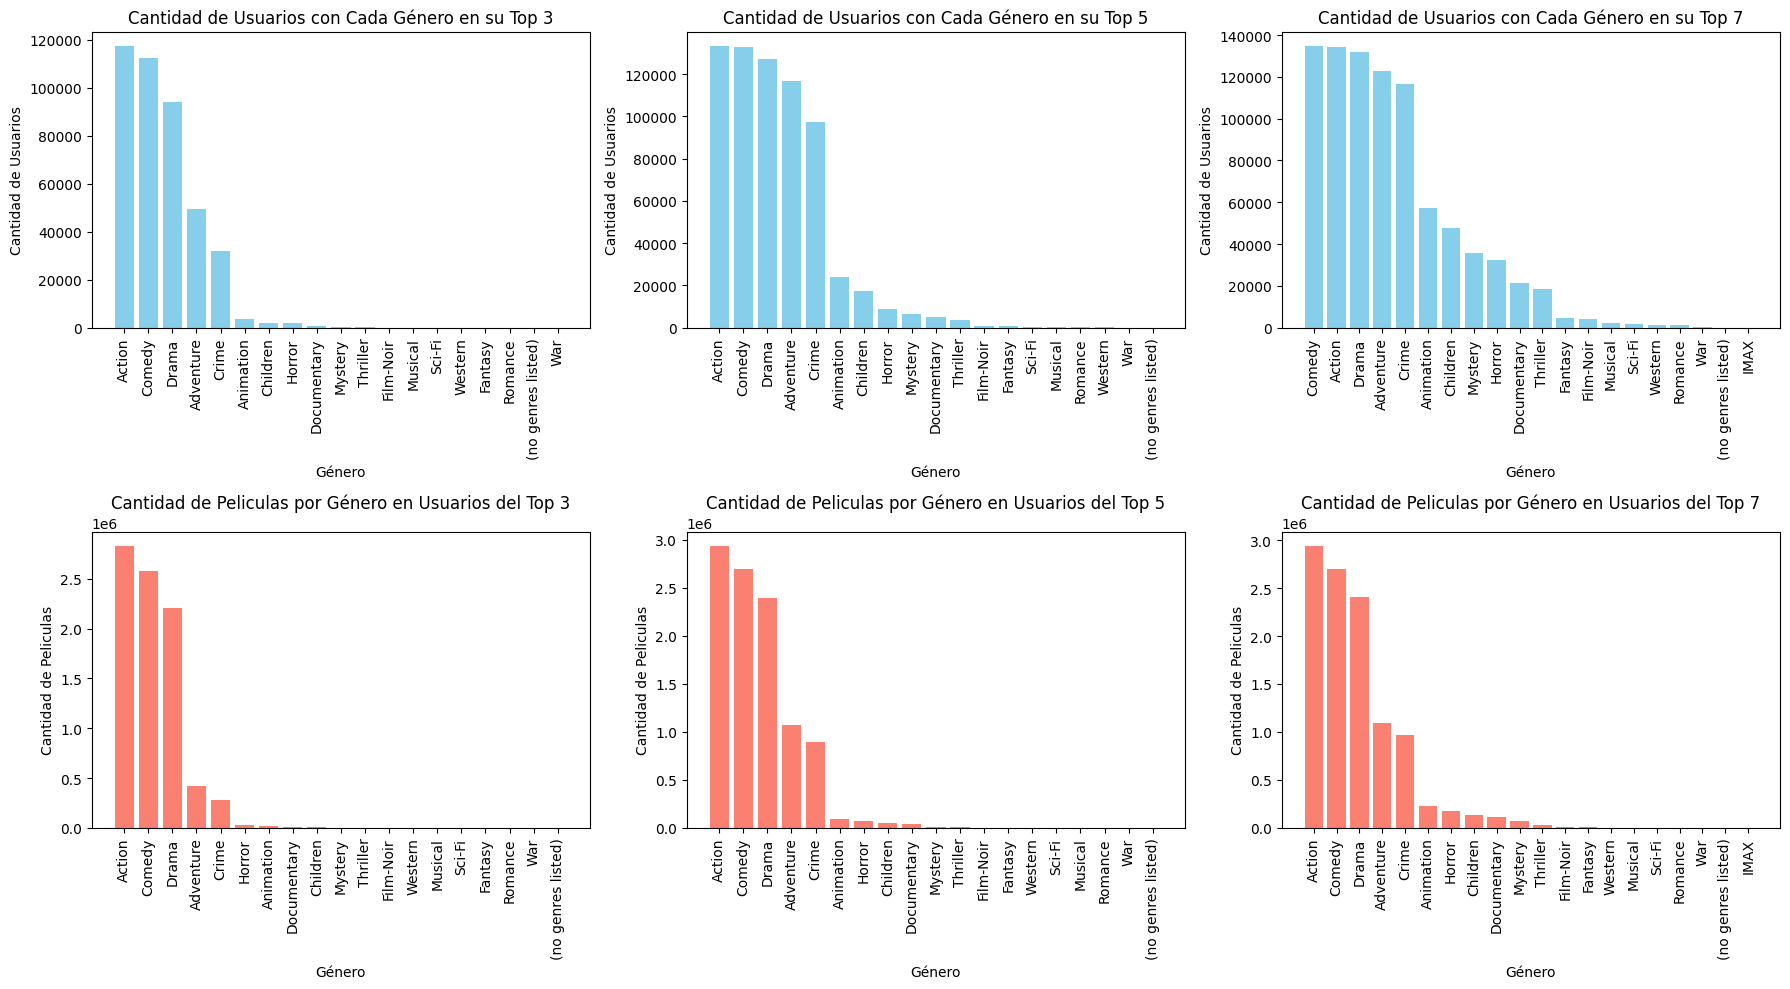

In [34]:
import matplotlib.pyplot as plt

# Lista de DataFrames y valores de K para iterar
top_k_dfs = [top_k_3_categories, top_k_5_categories, top_k_7_categories]
k_values = [3, 5, 7]

# Crear la figura y los ejes para la grilla de gráficos (2 filas, 3 columnas)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, (top_k_df, k) in enumerate(zip(top_k_dfs, k_values)):
    # Gráfico 1: Cantidad de usuarios que tienen cada género en su top K
    genre_user_count = top_k_df['genre_principal'].value_counts()
    axes[0, i].bar(genre_user_count.index, genre_user_count.values, color='skyblue')
    axes[0, i].set_title(f"Cantidad de Usuarios con Cada Género en su Top {k}")
    axes[0, i].set_xlabel("Género")
    axes[0, i].set_ylabel("Cantidad de Usuarios")
    axes[0, i].tick_params(axis='x', rotation=90)

    # Agrupar por genero principal para saber la cantidad de peliculas tiene el top k
    group_movie_by_genre = top_k_df.groupby('genre_principal')['count'].sum()
    # Ordenar por values
    group_movie_by_genre = group_movie_by_genre.sort_values(ascending=False)

    # Gráfico 2: Cantidad de peliculas por género en usuarios del top K
    axes[1, i].bar(group_movie_by_genre.index, group_movie_by_genre.values, color='salmon')
    axes[1, i].set_title(f"Cantidad de Peliculas por Género en Usuarios del Top {k}")
    axes[1, i].set_xlabel("Género")
    axes[1, i].set_ylabel("Cantidad de Peliculas")
    axes[1, i].tick_params(axis='x', rotation=90)

# Ajustar el layout para mejor visualización
plt.tight_layout()
plt.show()


vemos que la cantidad de generos no se aumenta o disminuye significativamente segun cambiemos el k. por lo que intentaremos ahora no solo con un genero principal sino incorporar los otros generos.